In [1]:
import pandas as pd
import numpy as np
from pykospacing import Spacing
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('ko_train_label.csv')
data

,id,document,toxic,obscene,threat,insult,identity_hate
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,1,0,0,0,0
1,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,1,0,0,0,0
2,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,1,0,0,0,0
3,7797314,원작의 긴장감을 제대로 살려내지못했다.,1,0,0,0,0
4,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,1,0,0,0,1
...,...,...,...,...,...,...,...
9994,7448293,혹시나 그래도 카메론디아즈니까 하고봤는데...먼이런영화를..이도저도아닌 .아암튼 시...,1,0,0,0,0
9995,5824024,10점주는것들 한국영화는 1점주네. M창,1,0,0,0,0
9996,6420437,영상도 아름답고 뭘 말하는지 알겠지만 그렇기 때문에 짜증나고 답답하다,1,0,0,0,0
9997,6777278,영화를 왜 영화라고 하는지 모르는 애들이 나왔네.,1,0,0,0,0


In [3]:
data = data.drop(labels = ['id'], axis = 1)
data

,document,toxic,obscene,threat,insult,identity_hate
0,아 더빙.. 진짜 짜증나네요 목소리,1,0,0,0,0
1,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,1,0,0,0,0
2,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,1,0,0,0,0
3,원작의 긴장감을 제대로 살려내지못했다.,1,0,0,0,0
4,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,1,0,0,0,1
...,...,...,...,...,...,...
9994,혹시나 그래도 카메론디아즈니까 하고봤는데...먼이런영화를..이도저도아닌 .아암튼 시...,1,0,0,0,0
9995,10점주는것들 한국영화는 1점주네. M창,1,0,0,0,0
9996,영상도 아름답고 뭘 말하는지 알겠지만 그렇기 때문에 짜증나고 답답하다,1,0,0,0,0
9997,영화를 왜 영화라고 하는지 모르는 애들이 나왔네.,1,0,0,0,0


In [4]:
data.isnull().sum()

document         0
toxic            0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [5]:
data.nunique()

document         9928
toxic               2
obscene             2
threat              2
insult              2
identity_hate       2
dtype: int64

In [6]:
data = data.dropna(how = 'any', axis = 0)
data

,document,toxic,obscene,threat,insult,identity_hate
0,아 더빙.. 진짜 짜증나네요 목소리,1,0,0,0,0
1,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,1,0,0,0,0
2,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,1,0,0,0,0
3,원작의 긴장감을 제대로 살려내지못했다.,1,0,0,0,0
4,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,1,0,0,0,1
...,...,...,...,...,...,...
9994,혹시나 그래도 카메론디아즈니까 하고봤는데...먼이런영화를..이도저도아닌 .아암튼 시...,1,0,0,0,0
9995,10점주는것들 한국영화는 1점주네. M창,1,0,0,0,0
9996,영상도 아름답고 뭘 말하는지 알겠지만 그렇기 때문에 짜증나고 답답하다,1,0,0,0,0
9997,영화를 왜 영화라고 하는지 모르는 애들이 나왔네.,1,0,0,0,0


In [7]:
data = data.drop_duplicates(subset = ['document'])
data

,document,toxic,obscene,threat,insult,identity_hate
0,아 더빙.. 진짜 짜증나네요 목소리,1,0,0,0,0
1,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,1,0,0,0,0
2,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,1,0,0,0,0
3,원작의 긴장감을 제대로 살려내지못했다.,1,0,0,0,0
4,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,1,0,0,0,1
...,...,...,...,...,...,...
9994,혹시나 그래도 카메론디아즈니까 하고봤는데...먼이런영화를..이도저도아닌 .아암튼 시...,1,0,0,0,0
9995,10점주는것들 한국영화는 1점주네. M창,1,0,0,0,0
9996,영상도 아름답고 뭘 말하는지 알겠지만 그렇기 때문에 짜증나고 답답하다,1,0,0,0,0
9997,영화를 왜 영화라고 하는지 모르는 애들이 나왔네.,1,0,0,0,0


In [9]:
type(data['toxic'][0])

numpy.int64

In [10]:
spacing = Spacing()
s_sl = []
for sentence in data['document']:
    s_sl.append(spacing(sentence))
s_sl

['아 더빙.. 진짜 짜증나네요 목소리',
 '교도소 이야기구먼 .. 솔직히 재미는 없다..평점 조정',
 '막 걸음마 뗀 3세부터 초등학교 1학년생인 8살 용 영화.ㅋㅋㅋ...별반 개도 아까움.',
 '원작의 긴장감을 제대로 살려내지 못했다.',
 '별 반개도 아깝다 욕 나온 다 이 응경 길용우 연기생활이 몇 년인지..정말 발로 해도 그것보단 낫겟다 납치. 감금만 반복 반복..이 드라마는 가족도 없다 연기 못하는 사람만 모엿네',
 '울면서 손 들고 횡단보도 건널 때 뛰쳐나올 뻔 이 범수 연기 드럽게 못해',
 '취향은 존중한 다지만 진짜 내 생에 극장에서 본 영화 중 가장 노잼 노감동 임 스토리도 어거지고 감동도 어거지',
 '굿바이 레닌 표절인 것은 이해하는데 왜 뒤로 갈수록 재미 없어지냐',
 '재미없다 지루하고. 같은 음식 영화인데도 바베트의 만찬하고 넘 차이남....바베트의 만찬은 이야기도 있고 음식 보는 재미도 있는데 ; 이건 볼 게 없다 음식도 별로 안 나오고, 핀란드 풍경이라도 구경할 랫는 데 그것도 별로 안 나옴 ㅡㅡ',
 '주제는 좋은데 중반부터 지루하다',
 '다 짤랐을 꺼야. 그래서 납득할 수 없었던 거야.. 그럴 꺼야.. 꼭 그랬던 걸 꺼야..',
 '카밀 라벨 발연기',
 '졸쓰레기 진부하고 말도 안 됌ㅋㅋ 아..시간 아까워',
 '1%라도 기대했던 내가 죄인입니다 죄인입니다....',
 '키이라 나 이틀리가 연기하고자 했던 건 대체 정신장애일까 틱장애일까',
 '포스터는 있어 보이는데 관객은 114명이네',
 "'다 알바생인가 내용도 없고 무서운 거도 없고 웃긴 거도 하나도 없음 완전 별 싱거운 영화.ㅇ.ㅇ내 ㅇ 시간 넘 아까움 .. . 완전 낚임",
 '평점에 속지 마시길 시간 낭비 돈 낭비임',
 '리얼리티가 뛰어나 긴 한데 큰 공감은 안간다. 이 민기 캐릭터는 정신의학상 분노조절 장애 초기 증상일 거다. 툭하면 사람 패고 욕하고 물건 파손하고.. 조금 오바였음. 극 초반엔 신선했는데 가면 갈수록 이 민기 정신상태 공감 불가.'

In [11]:
data['document'] = s_sl
data

C:\Users\김철용\AppData\Local\Temp/ipykernel_13576/3874160468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['document'] = s_sl


,document,toxic,obscene,threat,insult,identity_hate
0,아 더빙.. 진짜 짜증나네요 목소리,1,0,0,0,0
1,교도소 이야기구먼 .. 솔직히 재미는 없다..평점 조정,1,0,0,0,0
2,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살 용 영화.ㅋㅋㅋ...별반 개도 아까움.,1,0,0,0,0
3,원작의 긴장감을 제대로 살려내지 못했다.,1,0,0,0,0
4,별 반개도 아깝다 욕 나온 다 이 응경 길용우 연기생활이 몇 년인지..정말 발로 해...,1,0,0,0,1
...,...,...,...,...,...,...
9994,혹시나 그래도 카메론디아즈니까 하고 봤는데...먼 이런 영화를..이도 저도 아닌 ....,1,0,0,0,0
9995,10점주는 것들 한국영화는 1점주네. M창,1,0,0,0,0
9996,영상도 아름답고 뭘 말하는지 알겠지만 그렇기 때문에 짜증나 고 답답하다,1,0,0,0,0
9997,영화를 왜 영화라고 하는지 모르는 애들이 나왔네.,1,0,0,0,0


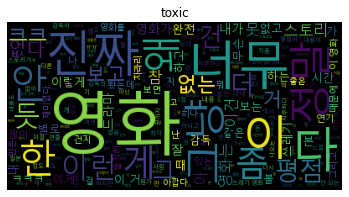

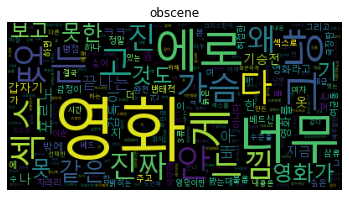

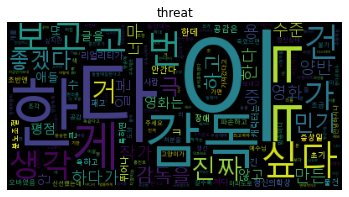

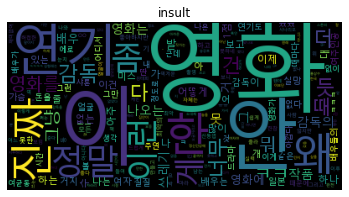

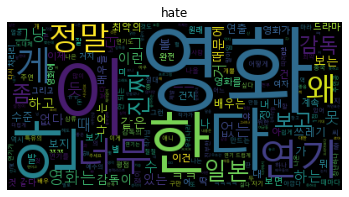

In [13]:
wc = WordCloud(font_path = 'C:\Windows\Fonts\malgun.ttf', max_words = 500).generate(' '.join(data[data['toxic'] == 1]['document']))
plt.imshow(wc)
plt.title('toxic')
plt.axis('off')
plt.show()

wc = WordCloud(font_path = 'C:\Windows\Fonts\malgun.ttf', max_words = 500).generate(' '.join(data[data['obscene'] == 1]['document']))
plt.imshow(wc)
plt.title('obscene')
plt.axis('off')
plt.show()

wc = WordCloud(font_path = 'C:\Windows\Fonts\malgun.ttf', max_words = 500).generate(' '.join(data[data['threat'] == 1]['document']))
plt.imshow(wc)
plt.title('threat')
plt.axis('off')
plt.show()

wc = WordCloud(font_path = 'C:\Windows\Fonts\malgun.ttf', max_words = 500).generate(' '.join(data[data['insult'] == 1]['document']))
plt.imshow(wc)
plt.title('insult')
plt.axis('off')
plt.show()

wc = WordCloud(font_path = 'C:\Windows\Fonts\malgun.ttf', max_words = 500).generate(' '.join(data[data['identity_hate'] == 1]['document']))
plt.imshow(wc)
plt.title('hate')
plt.axis('off')
plt.show()

In [14]:
len(data[data['toxic'] == 1])

9898

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='toxic', ylabel='count'>

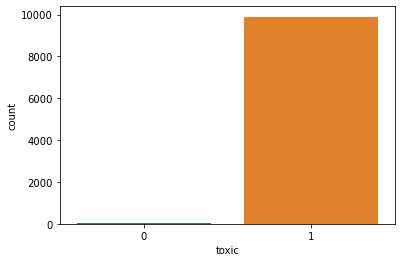

In [15]:
sns.countplot(data['toxic'])